# Housing Prices Classification

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

### Loading the dataset
The dataset file 'Ames_Housing_Sales.csv' is read using `pandas.csv_reader`, and stored in a `pandas.DataFrame`

In [46]:
df = pd.read_csv('Ames_Housing_Sales.csv', na_values='None')

In [47]:
# viewing the dataset in table format
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


`DataFrame.info()` is used to provide information about each data feature (`column`), namely, the name, the number of non-null entries, and the datatype(`Dtype`).

In [48]:
#displaying information for each feature (column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          82 non-null     object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       953 non-null    object 
 7   BsmtExposure   953 non-null    object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   953 non-null    object 
 11  BsmtFinType2   952 non-null    object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       953 non-null    object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

### Data Cleaning

#### Check Null Values
the `DataFrame.isna()` function of the DataFrame is used to return the subset of the data containing `null` values and storing the `sum()` into `na_vals`.
The subset of columns containing null values is displayed along with the number of null values for each column.

In [49]:
# Check missing values
na_vals = df.isna().sum()

#filter out the columns that have 0 null values
na_cols = na_vals[na_vals > 0]

print(f" == {len(na_cols)} Columns ==")
print(na_cols)

 == 11 Columns ==
Alley           1297
BsmtCond         426
BsmtExposure     426
BsmtFinType1     426
BsmtFinType2     427
BsmtQual         426
Fence           1114
FireplaceQu      618
MasVnrType       797
MiscFeature     1328
PoolQC          1372
dtype: int64


As can be seen, the number of missing values for each column is very high. This indicates that the features entailed are not reliable for data analysis. The columns will be dropped to avoid losing the bulk of data from the dataset. The `DataFrame.dropna()` function is utilized along `axis = 1`, indicating the `columns` instead of rows.

In [50]:
df.dropna(axis=1, inplace=True)

#### Check Duplicates
The dataset is checked for duplicated values using `DataFrame.duplicated()`. `sum()` yields the total number of duplicates.

In [51]:
df.duplicated().sum()

0

No duplicates found. No further actions are needed.

#### Get numerical & categorical features
The dataset is analyzed against the presence of categorical features. This is in order to later encode them to be ready for classification.
`DataFrame.select_dtypes` returns the subset of the data of a specific datatype or superset of datatypes.
A `pandas.Index` is created from the subtraction of the set of numerical features from the total set of features.

In [52]:
#return columns of `np.number` datatype
num_cols = df.select_dtypes(np.number).columns

#substract numerical columns from the total set of columns to get categorical features
cat_cols = pd.Index(list(set(df.columns) - set(num_cols)))

The `cat_cols` index is used to index `df` to obtain the number of unique values for each feature. This is accomplished using `DataFrame.nunique()`

In [53]:
# Check unique values for each feature
df[cat_cols].nunique()

Exterior2nd      16
CentralAir        2
HeatingQC         5
GarageQual        5
ExterQual         4
Exterior1st      14
Foundation        6
Street            2
Neighborhood     25
GarageCond        5
SaleCondition     6
HouseStyle        8
PavedDrive        3
LotConfig         5
RoofMatl          8
ExterCond         4
LandSlope         3
LotShape          4
Electrical        5
Heating           6
LandContour       4
MSZoning          5
BldgType          5
GarageType        6
GarageFinish      3
RoofStyle         6
SaleType          9
Utilities         2
Functional        7
KitchenQual       4
Condition2        8
Condition1        9
dtype: int64

#### Encode categorical features
The `LabelEncoder` class from scikit-learn is imported to assign a unique integer value for each unique category.
The `LabelEncoder.fit_transform()` function firstly computes the unique integers for each feature and then transforms the original dataset `df`.

In [54]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Iterate over the categorical features of df and transform them
for cat_col in cat_cols:
    df[cat_col] = le.fit_transform(df[cat_col])

In [55]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,3,0,706.0,0.0,1,0,150.0,...,0.0,1,8,856.0,0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,3,0,978.0,0.0,0,1,284.0,...,0.0,1,6,1262.0,0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,3,0,486.0,0.0,1,0,434.0,...,0.0,1,6,920.0,0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,3,0,216.0,0.0,1,0,540.0,...,0.0,1,7,756.0,0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,4,0,655.0,0.0,1,0,490.0,...,0.0,1,9,1145.0,0,192.0,2000,2000,2008,250000.0


As can be observed, the data is now purely numerical.

#### Outlier Removal
In this section, the dataset will be analyzed against the presence of outliers, and if detected, will be removed.
The target variable "SalePrice" is stored in variable `y`. It is, then, visualized using a Box Plot.

<Axes: >

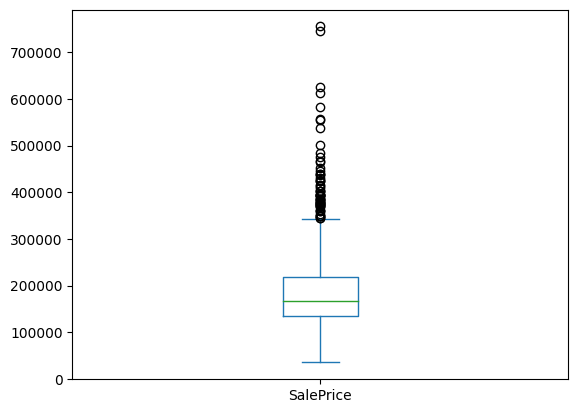

In [56]:
y = df["SalePrice"]
y.plot(kind="box")

As can be observed, a number of outliers is are located outside the third quartile. Below, it is seen that these data points are only 76. They will be removed, for 76 is a small number compared to the size of the dataset.

In [58]:
# Check number of sample above certain price
max_price = 325000
print(len(y[y > max_price]))

76


`df` is reassigned to the subset of data below the `max_price`. The dataset is then split into features `X` and target `y` i.e. the "SalePrice" feature.

In [59]:
# Samples above that number are considered as outliers
df = df[y < max_price]

# Separate data into features and target
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

### Data Scaling
The `StandardScaler` class is imported from scikit-learn to standardize features stored in `x` by removing the mean and scaling to unit variance. `fit_transform` is explained previously.

In [60]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

#Scale X
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-0.799945,1.239028,-0.117513,0.187396,-0.411888,0.664251,-0.298908,1.158936,-0.251106,-0.958988,...,0.294611,-0.276684,0.062161,1.058807,-0.443419,-0.027756,-0.750723,1.083272,0.909845,0.143770
1,0.338556,-0.802365,-0.117513,0.187396,-0.411888,1.301372,-0.298908,-0.806414,3.877845,-0.647367,...,0.294611,-0.276684,0.062161,-0.283692,0.564175,-0.027756,1.703848,0.155943,-0.407322,-0.609282
2,-0.620477,1.267713,-0.117513,0.187396,-0.411888,0.148933,-0.298908,1.158936,-0.251106,-0.298538,...,0.294611,-0.276684,0.062161,-0.283692,-0.284587,-0.027756,-0.750723,1.014581,0.861061,0.143770
3,-0.505505,1.004770,-0.117513,0.187396,-0.411888,-0.483502,-0.298908,1.158936,-0.251106,-0.052032,...,0.294611,-0.276684,0.062161,0.387558,-0.691595,-0.027756,-0.750723,-1.939134,-0.700025,-1.362334
4,0.010466,1.714716,-0.117513,1.482225,-0.411888,0.544791,-0.298908,1.158936,-0.251106,-0.168308,...,0.294611,-0.276684,0.062161,1.730057,0.273809,-0.027756,0.830745,0.980236,0.763493,0.143770


### Target Grouping
In order to classify housing prices into a specified set of classes, the target variable "SalePrice" needs to be divided into classes. This is accomplished using clustering techniques, as the classes are not defined a priori.

<Axes: >

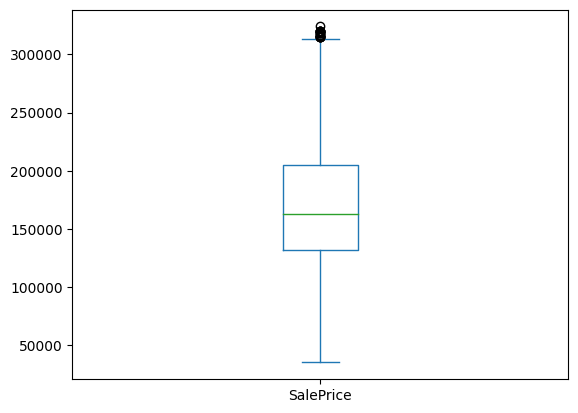

In [61]:
# Show the box plot of the target variable `y`
y.plot(kind="box")

<Axes: ylabel='Density'>

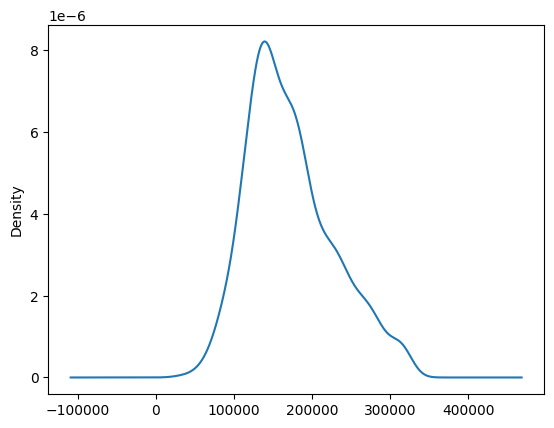

In [62]:
# Show the KDE plot of the target variable `y`
y.plot(kind = "kde")

From the plot above, it can be concluded that the `y` is not skewed, i.e. distributed somewhat equally around the mean.

The target `y` will be clustered into distinct groups using the scikit-learn class KMeans, which is an implementation of the k-means clustering algorithm.
The number of clusters `k` is set to 4.
`random_state` is used to produce repeatable results.
`n_init` is the number of times the k-means algorithm is run with different centroid seeds. it is set to 'auto'.
As required by the KMeans class, `y` is reshaped into a 2D array using `numpy.reshape()`.

`KMeans.fit_predict()` returns an array of cluster values, each for each data point.
`KMeans.cluster_centers_` stores the center of cluster for each data point

In [63]:
from sklearn.cluster import KMeans

#initialize kmeans clustering algorithm
k = 4
kmeans = KMeans(n_clusters=k, random_state=10, n_init='auto')

#predict cluster for each data point, store them in y_clustered
y_clustered = pd.Series(kmeans.fit_predict(np.array(y).reshape(-1, 1)))

#store cluster center for each data point
y_centers = pd.Series(kmeans.cluster_centers_[i] for i in y_clustered).astype("float64")

#view y_clustered
y_clustered.head()

0    3
1    3
2    3
3    1
4    0
dtype: int32

In [64]:
#view the centers and number of data points assigned to each
y_centers.value_counts()

144590.733615    473
193875.531579    388
103281.471616    229
266245.267281    209
Name: count, dtype: int64

`y` and `y_centers` are plotted using histograms to show the distribution of data before clustering and its distribution in the individual clusters.

Text(0, 0.5, 'Frequency')

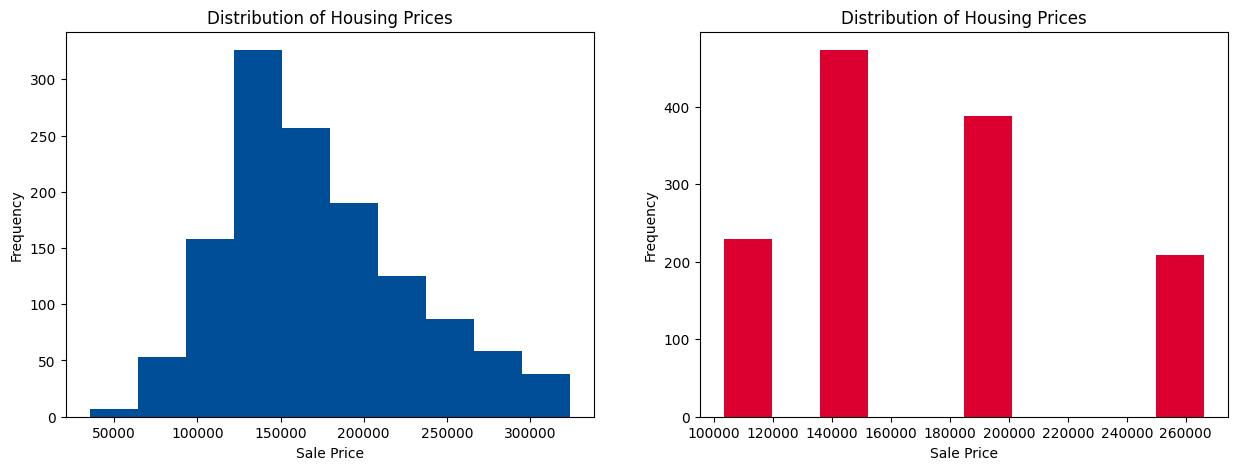

In [65]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
b = 10

y.plot(color="#004D98", kind="hist", bins=b, ax=ax[0])
ax[0].set_title('Distribution of Housing Prices')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Frequency')


y_centers.plot(color="#DB0030", kind="hist", bins=b, ax=ax[1])
ax[1].set_title('Distribution of Housing Prices')
ax[1].set_xlabel('Sale Price')
ax[1].set_ylabel('Frequency')

## Classification Algorithms

### Feature Selection
After the preliminary analysis and exploration of the dataset, it is evident that the dataset contains a lot of unwanted or unhelpful features. These features can worsen the model or cause it to over-fit to the training data. To avoid this, the use of feature selection is needed.

Two feature selection algorithms from scikit-learn will be used:
- `SelectPercentile` which selects the top percentile of the features after applying the scoring function.
- `SelectFromModel` which selects the features that best fit a certain Machine Learning model. Two models are used: `ExtraTreesClassifier` and `RandomForestClassifier`, both of which are classification algorithms that are based on Decision Trees.

The following statement gets a `pandas.Index` of feature names, excluding the target variable "SalePrice"

In [66]:
# Get Index of feature names
features = df.drop("SalePrice", axis=1).columns
features

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'ScreenPorch',
       'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF',
       'YearB

#### Feature Selection by percentile
In the following cell, features will be selected based on a percentile of features ranked by their scores. This will utilize the `SelectPercentile` class. Scores will be determined using the `f_classif` function which implements the ANOVA(Analysis Of Variance) F-value method.

The `f_sel` object of `SelectPercentile` returns `x_fcif` which is the subset of columns it has chosen via its `fit_transform` function. The features and target are inputs to the function. A percentile of 50% of the features will be chosen.

In [67]:
# Import feature selection algorithms
from sklearn.feature_selection import SelectFromModel, SelectPercentile
# Import scoring function
from sklearn.feature_selection import f_classif

# f_classification
f_sel = SelectPercentile(score_func=f_classif, percentile=50)
x_fcif = f_sel.fit_transform(x, y)
x_fcif.shape

(1299, 34)

#### Feature Selection for an Extra Trees model
In this algorithm, features will be chosen for an Extra Trees classification model. The model is firstly imported, instantiated as `etc`, initialized with 50 estimators(trees), and, then, fit to the data.

The selector is instantiated as `etc_sel`, initialized with the model, and it is specified that the model has been fit before feature selection using `prefit = True`.
The model is pre-fit to improve accuracy of feature selection.

`x_etc` is, similarly, the subset of chosen columns, however, it is obtained from the `transform` function instead of `fit_transform`, because the model was pre-fit to the data.

In [68]:
# Import ExtraTrees classifier
from sklearn.ensemble import ExtraTreesClassifier

# Initialize model with 50 estimators and fit to data
etc = ExtraTreesClassifier(n_estimators=50).fit(x, y)

# Select from model
etc_sel = SelectFromModel(etc, prefit=True)
x_etc = etc_sel.transform(x)
x_etc.shape

(1299, 31)

#### Feature Selection for a Random Forest model
This cell is similar to the previous one, only different in the type of model, which, in this case, is the `RandomForestClassifier`.

In [69]:
# Import RandomForest classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize model with 50 estimators and fit to data
rfc = RandomForestClassifier(n_estimators=50).fit(x, y)

# Select from model
rfc_sel = SelectFromModel(rfc, prefit=True)
x_rfc = rfc_sel.transform(x)
x_rfc.shape

(1299, 24)

#### Analyzing Selections
Selecting features that are common to multiple feature selection methods is a useful approach to identify the most informative features for a machine learning model. This approach can reduce the risk of selecting features that are only informative for a specific method or selecting redundant features. By selecting the features that are agreed upon by multiple methods, we can potentially improve the generalization performance of our model and make it more robust to variations in the data.

A boolean mask, i.e. an array to represent the selected features with a `True` boolean value and the deselcted with `False`, is obtained from each selection via the `get_support` method. The mask are logicalled anded to produce a mask of the agreed upon features.

The feature dataset `x` will be indexed with the produced mask, which will yield the selected data.

In [70]:
mask1 = f_sel.get_support()
mask2 = etc_sel.get_support()
mask3 = rfc_sel.get_support()

mask  = np.logical_and(mask1, mask2, mask3)

x_selected = x[:,mask]

### train_evaluate() function

This function trains and evaluates a machine learning model on a given dataset. The function takes the following arguments:

- `model`: The machine learning model to train and evaluate.
- `x`: The feature data.
- `y`: The target data.
- `grid_params`: A dictionary of hyperparameters to tune using grid search. If None, grid search will not be used.
- `cv`: The number of folds to use for cross-validation.

The function first splits the data into train and test sets. If grid search is being used, the function then performs grid search to find the best hyperparameters for the model. The function then trains the model on the train set and evaluates the model on the test set. The function prints the classification report and confusion matrix for the model.

The `train_evaluate()` function can be used to train and evaluate any machine learning model. It is a useful function for comparing different models and for finding the best hyperparameters for a given model.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

def train_evaluate(model, x, y, grid_params=None, cv=5):
    # split data into train & test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)

    # check for applying grid search
    if grid_params is None:
        model.fit(x_train, y_train)
    else:
        model_gs = GridSearchCV(model, grid_params, scoring='balanced_accuracy', cv=cv, return_train_score=True)
        model_gs.fit(x_train, y_train)
        print(model_gs.best_params_)
        model = model_gs.best_estimator_

    # predict test results
    y_pred = model.predict(x_test)

    # show results
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion_Matrix:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

    return model

### KNN

{'n_neighbors': 9, 'weights': 'distance'}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.72      0.82      0.77        44
           2       0.93      0.62      0.74        21
           3       0.76      0.76      0.76        46

    accuracy                           0.75       130
   macro avg       0.78      0.73      0.75       130
weighted avg       0.77      0.75      0.75       130

Confusion_Matrix:


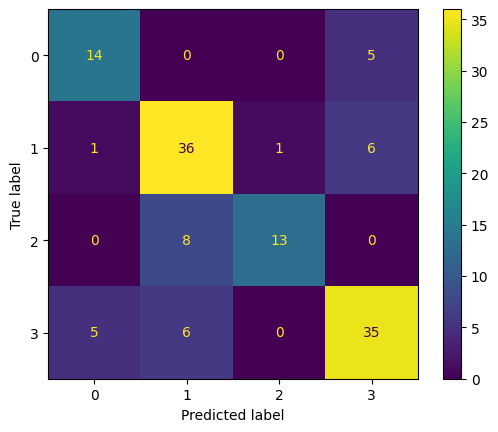

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier??
grid_params = {"n_neighbors": [5, 7, 9], "weights": ["uniform", "distance"]}
knn = train_evaluate(KNeighborsClassifier(), x_selected, y_clustered, grid_params)

### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.67      0.70      0.69        44
           2       0.76      0.76      0.76        21
           3       0.74      0.70      0.72        46

    accuracy                           0.72       130
   macro avg       0.72      0.72      0.72       130
weighted avg       0.72      0.72      0.72       130

Confusion_Matrix:


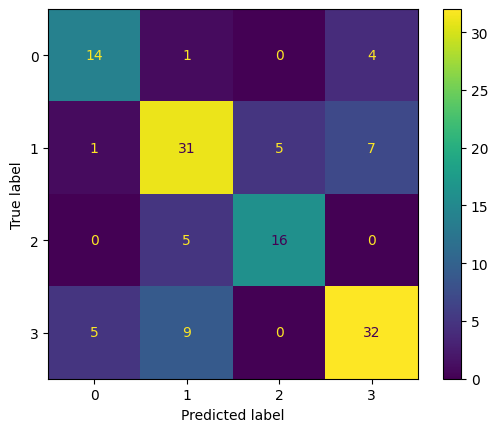

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = train_evaluate(GaussianNB(), x_selected, y_clustered)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60        19
           1       0.68      0.68      0.68        44
           2       0.75      0.71      0.73        21
           3       0.69      0.67      0.68        46

    accuracy                           0.68       130
   macro avg       0.67      0.68      0.67       130
weighted avg       0.68      0.68      0.68       130

Confusion_Matrix:


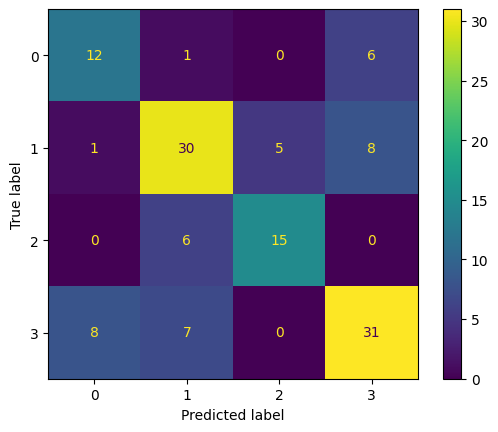

In [31]:
from sklearn.naive_bayes import BernoulliNB
mnb = train_evaluate(BernoulliNB(), x_selected, y_clustered)

### Combining Classifiers

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.70      0.73      0.71        44
           2       0.78      0.67      0.72        21
           3       0.74      0.74      0.74        46

    accuracy                           0.72       130
   macro avg       0.73      0.72      0.72       130
weighted avg       0.72      0.72      0.72       130

Confusion_Matrix:


StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=9,
                                                     weights='distance')),
                               ('gnb', BernoulliNB())],
                   final_estimator=KNeighborsClassifier(n_neighbors=9,
                                                        weights='distance'))

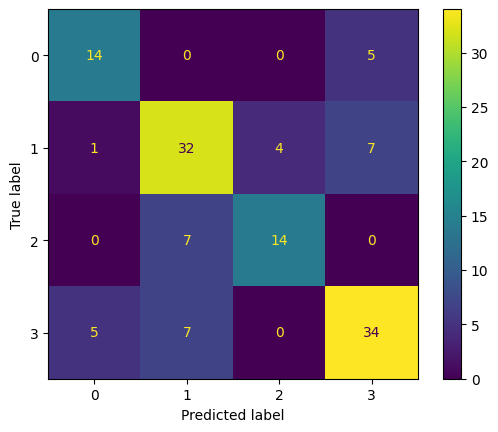

In [41]:
from sklearn.ensemble import StackingClassifier

s_knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
s_gnb = GaussianNB()
s_bnb = BernoulliNB()
stacked = StackingClassifier(estimators=[('knn', s_knn), ('gnb', s_bnb)], final_estimator=s_knn)

train_evaluate(stacked, x_selected, y_clustered)